# Admission prediction

In [1]:
# importing required libraries
import numpy as np     #for numerical operation
import pandas as pd   #for data wrangling
import matplotlib.pyplot as plt
import seaborn as sns   #matplotlib and seaborn for data visualization
sns.set()
from sklearn.linear_model import LinearRegression # machine model for prediction
import pingouin as pg   #for normality test
from statsmodels.stats.outliers_influence import variance_inflation_factor   # to check multi-colinearity
from sklearn import metrics   # for model evaluation
from sklearn.preprocessing import StandardScaler   #for feature scaling
from statsmodels.stats.stattools import durbin_watson   # to check autocorelation

# load data

In [2]:
data=pd.read_csv('Admission.csv')  #reading csv file into dataframe 'data'

In [3]:
data.head() #top 5 rows of data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Understanding the data

In [4]:
data.info()  #concise summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
data.describe()  #statiscal summary of data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.isnull().sum()  #checking null values in data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

So there are no missing values in  data

In [7]:
data.drop('Serial No.',axis=1,inplace=True)   #droping 'Serial No' as it is not required

In [8]:
data.head()  #'serial no' dropped now

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data Analysis

<AxesSubplot:title={'center':'Chance of admit Distribution Plot'}, xlabel='Chance of Admit ', ylabel='Count'>

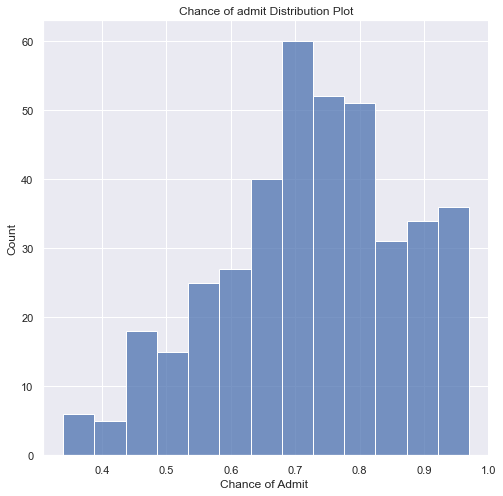

In [9]:
#plotting histogram to check the distribution of data
plt.figure(figsize=(8,8))
plt.title('Chance of admit Distribution Plot')
sns.histplot(x=data['Chance of Admit '])

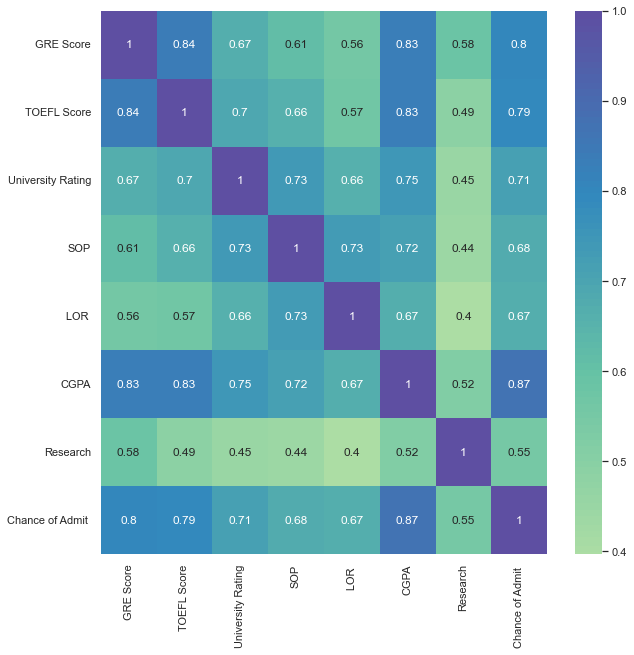

In [10]:
# plotting correlaton with the help of heatmap
plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='Spectral',center=0)

<AxesSubplot:ylabel='SOP'>

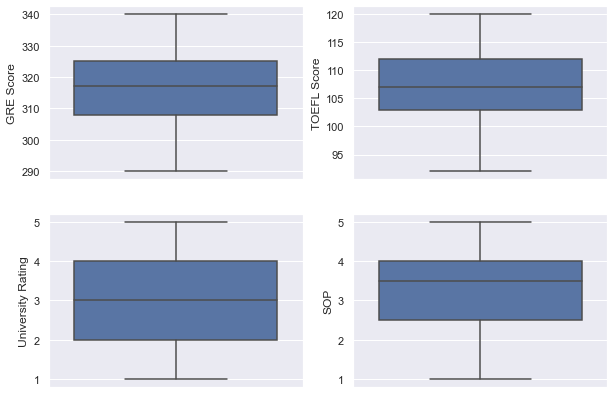

In [11]:
#plotting boxplot to see outliers
f, axes = plt.subplots(2, 2,figsize=(10,7))
sns.boxplot(y= "GRE Score", data=data,  orient='v' , ax=axes[0,0])
sns.boxplot(y= "TOEFL Score", data=data,  orient='v' , ax=axes[0,1])
sns.boxplot(y= "University Rating", data=data,  orient='v' , ax=axes[1,0])
sns.boxplot(y= "SOP", data=data,  orient='v' , ax=axes[1,1])

<AxesSubplot:ylabel='CGPA'>

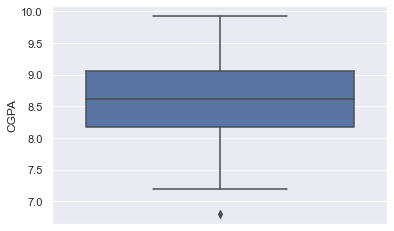

In [12]:
sns.boxplot(y= "CGPA", data=data,  orient='v')

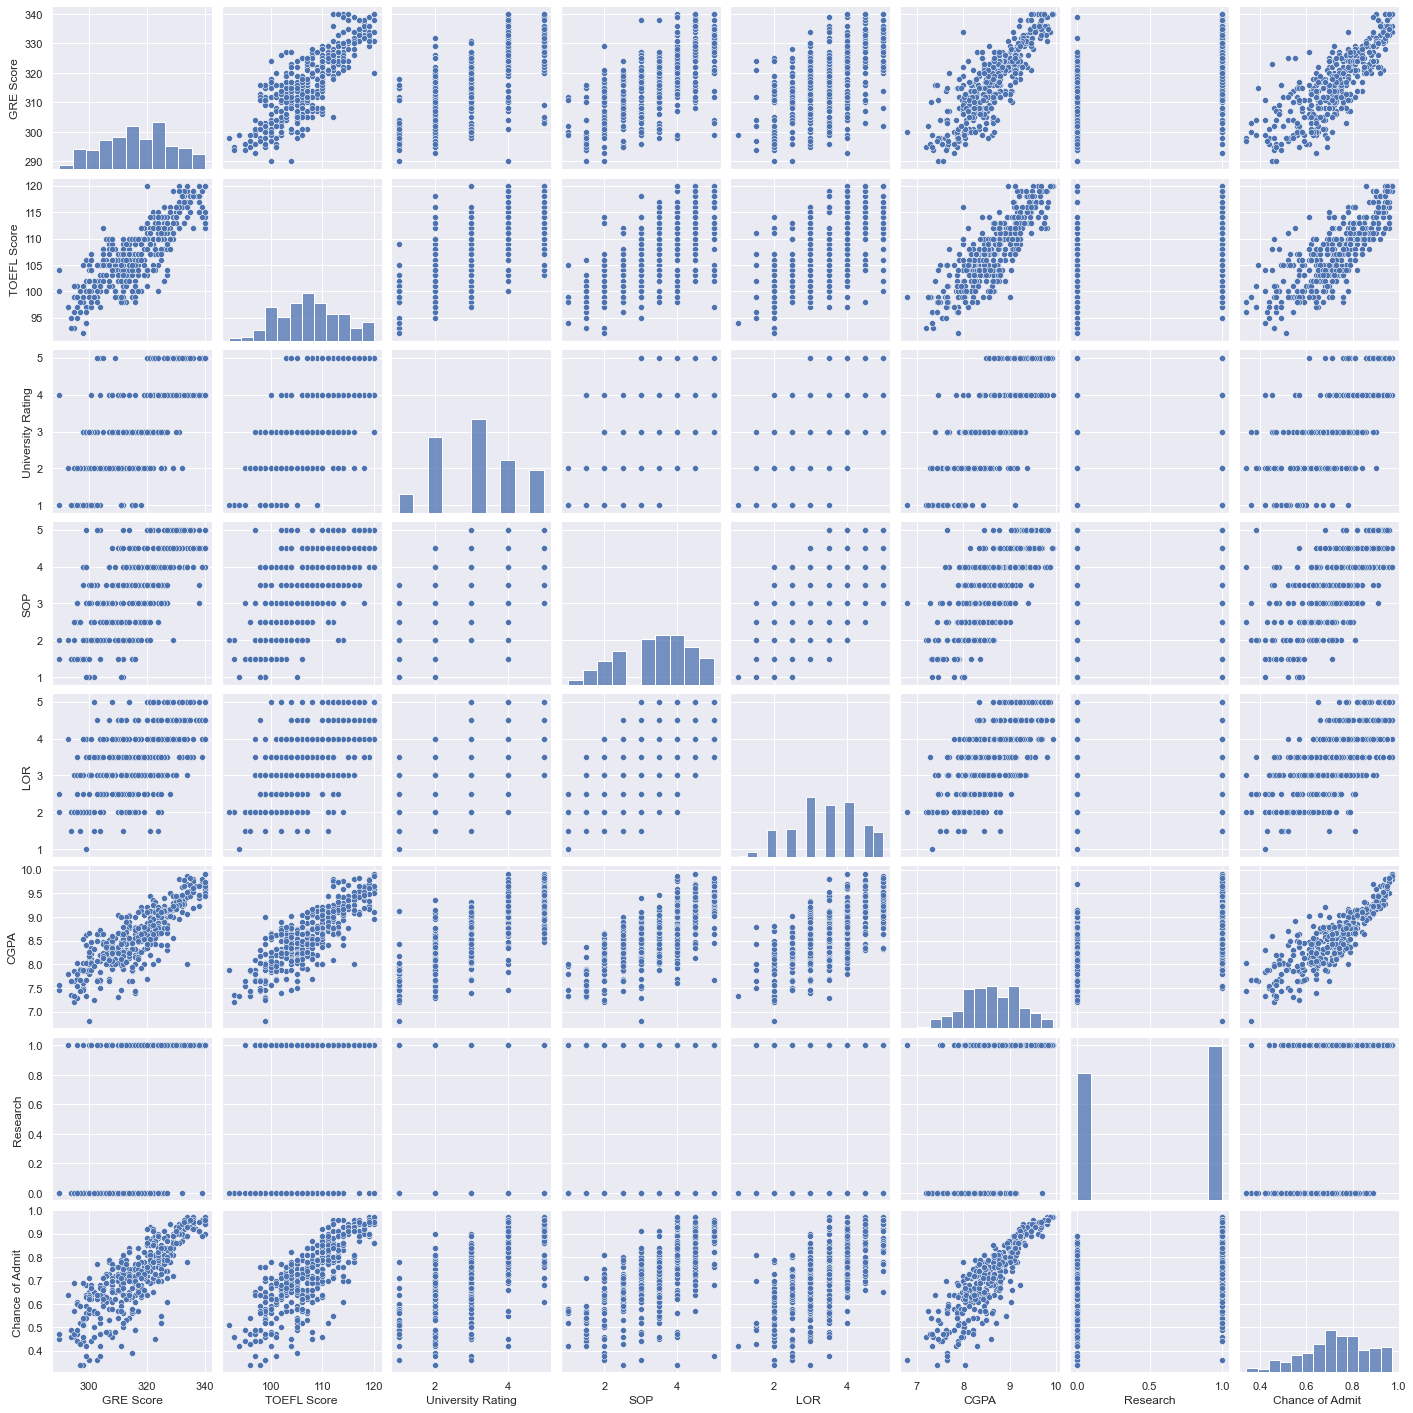

In [13]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(data)

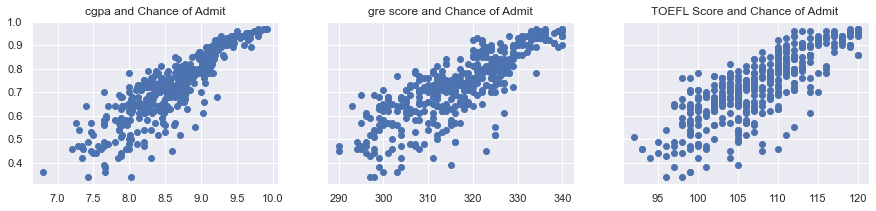

In [14]:
#plotting scatter plot between ('CGPA','GRE Score','TOEFL score')
f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey=True,figsize=(15,3))
ax1.scatter(data['CGPA'],data['Chance of Admit '])
ax1.set_title('cgpa and Chance of Admit') 
ax2.scatter(data['GRE Score'],data['Chance of Admit '])
ax2.set_title('gre score and Chance of Admit')
ax3.scatter(data['TOEFL Score'],data['Chance of Admit '])
ax3.set_title('TOEFL Score and Chance of Admit ')
plt.show()

# Creating Model

In [15]:
index_no=data.columns.get_loc('Research')
print(index_no)

6


In [16]:
# selecting independent features in 'X' variable and dependent feature in 'y' variable
X=data.drop('Chance of Admit ',axis=1)
y=data[['Chance of Admit ']]

## Data preprocessing

In [17]:
# creating function to scale our feature
def scale(features):
    scaler=StandardScaler()
    scaler.fit(features)
    x_scaled=scaler.transform(features)
    x=pd.DataFrame(x_scaled)
    x[6]=data['Research']
    return x

In [18]:
X=scale(X.drop('Research',axis=1))

# create regression

# Assumptions to check:
##### Autocorrelation:Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

##### Multicollinearity:VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

##### Heteroskedasticity:look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern

##### Normal Distribution of error terms: look at QQ plot

In [19]:
# for spliting data into train and test set
from sklearn.model_selection import train_test_split

In [20]:
#spltting 75% data into 'trainset' and 25% into 'testset'
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=95)

In [21]:
#fitting regression into train set
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
# creating function to create model and model evalution
def model(X,y,x_test,y_test):
    #fitting values to model
    reg.fit(X,y)
    #predicting on train set
    ypred_train=reg.predict(X)
    print("r2_score(train): ", metrics.r2_score(y, ypred_train))   #r-square on train set
    #predicting on test set
    ypred_test=reg.predict(x_test)
    print("r2_score(test): ", metrics.r2_score(y_test, ypred_test))  #r-square on test test
    #adjusted r-square calculation
    print('Adj_r2_train:',1-((1-metrics.r2_score(y, ypred_train))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))
    print("mean_squared_error(MSE) Test : ", metrics.mean_squared_error(y_test, ypred_test))
    print("root_mean_squared_error (RMSE)on train: ", np.sqrt(metrics.mean_squared_error(y, ypred_train)))
    print("root_mean_squared_error (RMSE)on test: ", np.sqrt(metrics.mean_squared_error(y_test, ypred_test)))
    
    #Autocorrelation with durwin watson
    print('Autocorrelation score on train',durbin_watson((y_train-ypred_train)))
    print('Autocorrelation score on test',durbin_watson((y_test-ypred_test)))
    
    #plots for assumptions
    f, (axes) = plt.subplots(2, 2,figsize=(12,9))
    #qq plot to check normality of errors
    pg.qqplot((y_test-ypred_test),ax=axes[0,0])
    axes[0,0].set_title('Normality of errors in test set',fontsize=16)
    pg.qqplot((y_train-ypred_train),ax=axes[0,1])
    axes[0,1].set_title('Normality of errors in train set',fontsize=16)
    # scatter plot between 'residual' and fitted value
    axes[1,0].scatter((y_test-ypred_test),(ypred_test))
    axes[1,0].set_title('Hetroskedasticity on test set',fontsize=16)
    axes[1,1].scatter(x=(y_train-ypred_train),y=(ypred_train))
    axes[1,1].set_title('Hetroskedasticity on train set',fontsize=16)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)

r2_score(train):  0.8079708097259629
r2_score(test):  0.7781049281639076
Adj_r2: 0.8033673702330921
mean_squared_error(MSE) Test :  0.004300770282327144
root_mean_squared_error (RMSE)on train:  0.0626953094280724
root_mean_squared_error (RMSE)on test:  0.0655802583276945
Autocorrelation score on train [2.2941471]
Autocorrelation score on test [1.99406198]


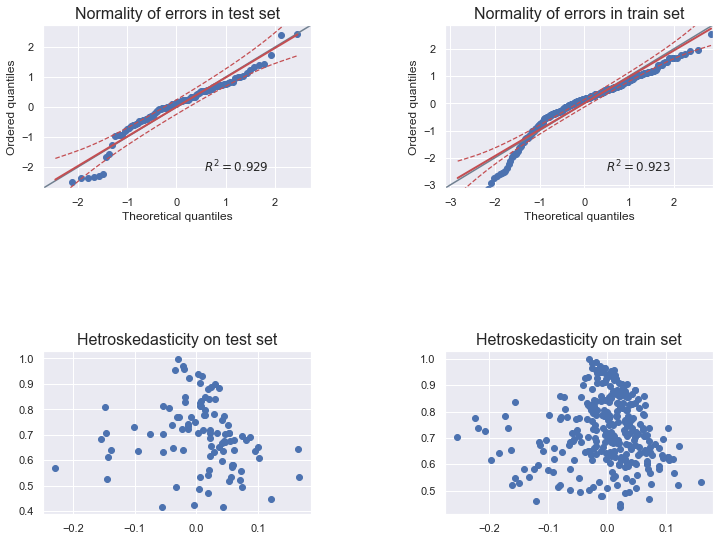

In [23]:
model(x_train,y_train,x_test,y_test)

##### normality of errors:So all good 'residuls' on both 'Training' and 'Test set' normally distributed we have checked with qq plot

#### for 'Hetroskedasticity' when we plot scatter plot between residuals vs fitted value,it will look like funnel shape, but in scatter plot we can see the graph does not look like funnel shape so there is no hetroskedasticity

#### autocorrelation: dw in 'train' and 'test set' is close to 2 we can consider as no autocorrelation

### Detecting autocorrelation

### Detecting Multicollinearity using VIF

In [24]:
# creating function to create dataframe with feature and there VIF score
def calc_vif(P):

    # Calculating VIF
    vif = pd.DataFrame()    #creating dataframe vif
    vif["variables"] = P.columns    #creatin variables column in vif dataframe
    vif["VIF"] = [variance_inflation_factor(P.values, i) for i in range(P.shape[1])]  #passing varilbe to calculate vif

    return(vif)

In [25]:
P =data
calc_vif(P)

,variables,VIF
0,GRE Score,1607.928316
1,TOEFL Score,1373.804681
2,University Rating,22.998812
3,SOP,38.051007
4,LOR,39.774185
5,CGPA,1333.886926
6,Research,3.211789
7,Chance of Admit,108.476950


#### These features  ['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '] have high multicolinearity, as there vif score>5,let see the vif score after droping them

In [26]:
P =data.drop(columns=['CGPA','LOR ','Chance of Admit ','University Rating','TOEFL Score','SOP',],axis=1)
calc_vif(P)

,variables,VIF
0,GRE Score,2.314038
1,Research,2.314038


#### Now VIF Score is under <5 so these features have no multicolinearity

#### We can also calculate mutlicoliearity with corr()

In [27]:
# calculating correlation for all features
cor_matrix = data.corr().abs()   #.abs() only applies to elements that are all numeric.
print(cor_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

In [28]:
#stroing uper triangle from correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))  

C:\Users\my\AppData\Local\Temp/ipykernel_6516/3410405001.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [29]:
# storing features that has correlation greater than .65
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
print(); print(to_drop)


['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


In [30]:
#dropping highly corelated features
X=data.drop(columns=['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '],axis=1)
y=data[['Chance of Admit ']]

In [31]:
X=scale(X.drop('Research',axis=1))

In [32]:
#splitting data into 75% into train set and 25% on test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=95)

r2_score(train):  0.6587675236574918
r2_score(test):  0.633688130670469
Adj_r2: 0.6564696618639396
mean_squared_error(MSE) Test :  0.00709985665134497
root_mean_squared_error (RMSE)on train:  0.083575042046741
root_mean_squared_error (RMSE)on test:  0.08426064710969748
Autocorrelation score on train [2.21184779]
Autocorrelation score on test [1.92584208]


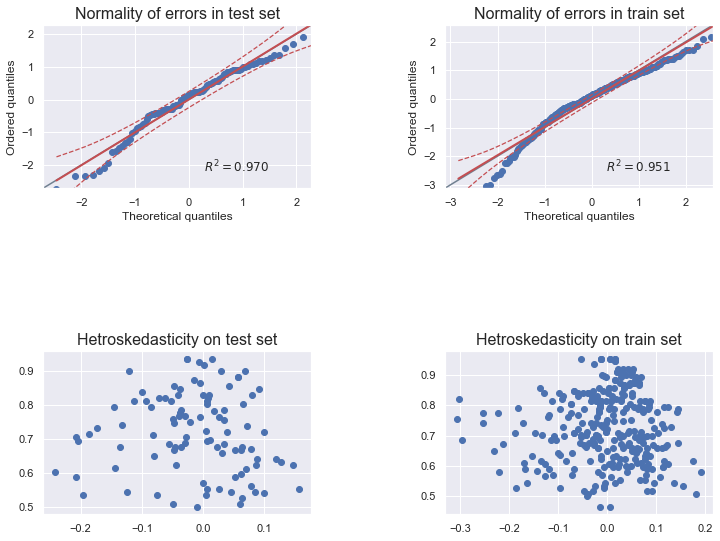

In [33]:
# builidng model with 'GRE Score' and 'research'
model(x_train,y_train,x_test,y_test)

#### normality of errors:So all good 'residuls' on both 'Training' and 'Test set' normally distributed we have checked with qq plot
#### for 'Hetroskedasticity' when we plot scatter plot between residuals vs fitted value,it will look like funnel shape, but in scatter plot we can see the graph does not look like funnel shape so there is no hetroskedasticity
#### autocorrelation: dw in 'train' and 'test set' is close to 2 we can consider as no autocorrelation

#### Our r-square goes down because r2 consider all features but now our model is more robust and assumptions free with less RMSE 

In [34]:
#creating functiopn for some prediction
def Admit_chance_prediction(x):
    x=scale(x.drop('Research',axis=1))
    pred=reg.predict(x)
    X_person['Chance of Admit']=pred
    return X_person

In [35]:
#prediction data
X_person=pd.DataFrame({'GRE Score':[354,300,290],
                       'Research':[1,0,1]})
X_person

,GRE Score,Research
0,354,1
1,300,0
2,290,1


In [36]:
# prediction of admit chance on x_person data
Admit_chance_prediction(X_person)

,GRE Score,Research,Chance of Admit
0,354,1,0.890544
1,300,0,0.696740
2,290,1,0.660850


# Model building using Decision tree regressor

In [52]:
# selecting independent features in 'X' variable and dependent feature in 'y' variable
X=data.drop('Chance of Admit ',axis=1)
y=data[['Chance of Admit ']]

In [61]:
#splitting data into 75% into train set and 25% on test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 7)
(100, 7)
(300, 1)
(100, 1)


#### Decision trees and ensemble methods do not require feature scaling to be performed

In [64]:
# selecting decision tree regression
from sklearn.tree import DecisionTreeRegressor

#### building decison tree regressor and evaluating model

In [69]:
#creating decision tree regressor with criterion as 'sqaured_error' as we are perforimg regression
dreg=DecisionTreeRegressor(criterion='squared_error',max_depth=5)
dreg.fit(X_train,y_train)     #fitting model in train set
train_pred=dreg.predict(X_train)    #prediction on test set
test_pred=dreg.predict(X_test)

#model evaluation
print('r-square in train',metrics.r2_score(y_train,train_pred))
print('r-square in test',metrics.r2_score(y_test,test_pred))
print('Adj_r2_train:',1-((1-metrics.r2_score(y_train, train_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))
print('Adj_r2_test:',1-((1-metrics.r2_score(y_test, test_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))
print("mean_squared_error(MSE) Test : ", metrics.mean_squared_error(y_test, test_pred))
print("root_mean_squared_error (RMSE)on train: ", np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print("root_mean_squared_error (RMSE)on test: ", np.sqrt(metrics.mean_squared_error(y_test, test_pred)))


r-square in train 0.8785023664322233
r-square in test 0.5312092869613685
Adj_r2_train: 0.8763327658327987
Adj_r2_test: 0.5228380242285358
mean_squared_error(MSE) Test :  0.008181012058358202
root_mean_squared_error (RMSE)on train:  0.05077276312428012
root_mean_squared_error (RMSE)on test:  0.09044894724847936


In [70]:
# for evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score

In [87]:
# creating a for loop to find out best maxdepth for our model by accuracy
accuracy_rate=[]
for i in range(1,10):
    dreg=DecisionTreeRegressor(criterion='squared_error',max_depth=i)
    score=cross_val_score(dreg,X_train,y_train)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy rate')

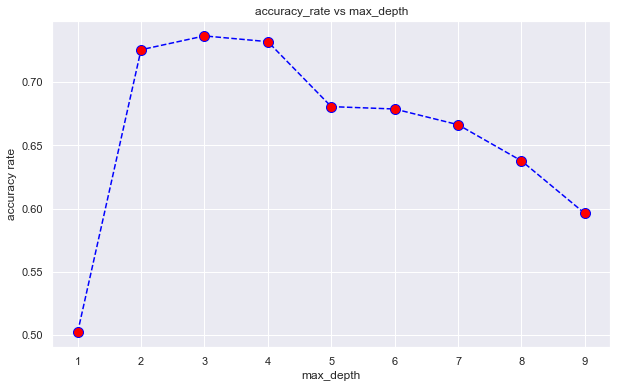

In [88]:
#plotting accuracy for maxdepth between 1 to 10
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy_rate vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy rate')

In [85]:
#creating decision tree regressor with criterion as 'sqaured_error' as we are perforimg regression
dreg=DecisionTreeRegressor(criterion='squared_error',max_depth=4)
dreg.fit(X_train,y_train)     #fitting model in train set
train_pred=dreg.predict(X_train)    #prediction on test set
test_pred=dreg.predict(X_test)

#model evaluation
print('r-square in train',metrics.r2_score(y_train,train_pred))
print('r-square in test',metrics.r2_score(y_test,test_pred))
print('Adj_r2_train:',1-((1-metrics.r2_score(y_train, train_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))
print('Adj_r2_test:',1-((1-metrics.r2_score(y_test, test_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))
print("mean_squared_error(MSE) Test : ", metrics.mean_squared_error(y_test, test_pred))
print("root_mean_squared_error (RMSE)on train: ", np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print("root_mean_squared_error (RMSE)on test: ", np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

r-square in train 0.8468515180627176
r-square in test 0.6146814074915585
Adj_r2_train: 0.844116723742409
Adj_r2_test: 0.6078007183396221
mean_squared_error(MSE) Test :  0.006724314206628492
root_mean_squared_error (RMSE)on train:  0.05700372516221786
root_mean_squared_error (RMSE)on test:  0.08200191587169468
